# Workload Characterization

## Introduction

### Import relevant modules

In [2]:
# Data Analysis
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Utilities
import numpy as np
# import warnings

In [3]:
%config InlineBackend.figure_format = 'retina'

#### Low level parameters

In [6]:
df_low = pd.read_csv('WC_report_server.csv', sep='\s+', skiprows=1)
df_low.rename(columns={'r':'procs_r', 'b':'procs_b',
                       'swpd':'memory_swpd', 'free':'memory_free', 'buff':'memory_buff', 'cache':'memory_cache', 
                       'si':'swap_si', 'so':'swap_so', 
                       'bi':'io_bi', 'bo':'io_bo',
                       'in':'system_in', 'cs':'system_cs',
                       'us':'cpu_us', 'sy':'cpu_sy', 'id':'cpu_id', 'wa':'cpu_wa', 'st':'cpu_st'
                      }, inplace=True)
df_low.head()

,procs_r,procs_b,memory_swpd,memory_free,memory_buff,memory_cache,swap_si,swap_so,io_bi,io_bo,system_in,system_cs,cpu_us,cpu_sy,cpu_id,cpu_wa,cpu_st
0,4,0,254148,121724,56628,1332972,4,20,143,217,245,1285,12,2,84,2,0
1,0,0,254148,121716,56632,1333004,0,0,0,72,139,370,6,0,85,9,0
2,0,0,254148,121716,56632,1333008,0,0,0,0,59,100,0,0,100,0,0
3,0,0,254148,121716,56632,1333008,0,0,0,0,70,123,0,0,100,0,0
4,0,0,254148,121716,56632,1333008,0,0,0,0,107,4209,8,3,89,0,0


In [7]:
print('The dataset contains', df_low.shape[1], 'columns and', df_low.shape[0], 'rows')

The dataset contains 17 columns and 310 rows


# High level parameters

## Read data

In [4]:
df_high = pd.read_csv('WC_report_client.csv')
df_high.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1609320468373,109,HTTP Request - Repubblica Home,200,OK,Thread Group - Fast 2-1,text,True,NaN,387753,135,1,3,http://192.168.56.101/RepubblicaHome.html,58,0,32
1,1609320468373,109,HTTP Request - Repubblica Home,200,OK,Thread Group - Slow 1-1,text,True,NaN,387753,135,1,3,http://192.168.56.101/RepubblicaHome.html,58,0,32
2,1609320468374,125,HTTP Request - Reddit Home,200,OK,Thread Group - Home 3-1,text,True,NaN,911062,131,1,3,http://192.168.56.101/RedditHome.html,92,0,32
3,1609320468662,11,HTTP Request - Reddit Home,200,OK,Thread Group - Slow 1-2,text,True,NaN,911062,131,2,4,http://192.168.56.101/RedditHome.html,3,0,1
4,1609320468682,6,HTTP Request - Repubblica Home,200,OK,Thread Group - Fast 2-2,text,True,NaN,387753,135,2,5,http://192.168.56.101/RepubblicaHome.html,2,0,1


In [5]:
print('The dataset contains', df_high.shape[1], 'columns and', df_high.shape[0], 'rows')

The dataset contains 17 columns and 40416 rows


In [8]:
df_high['success'].all()

True

In [12]:
df_high.loc[df_high['label']=='HTTP Request - Wikipedia Home', 'Type'] = 'small'
df_high.loc[df_high['label']=='HTTP Request - Wikipedia Page', 'Type'] = 'small'

df_high.loc[df_high['label']=='HTTP Request - Repubblica Home', 'Type'] = 'medium'
df_high.loc[df_high['label']=='HTTP Request - Repubblica Page', 'Type'] = 'medium'

df_high.loc[df_high['label']=='HTTP Request - Reddit Home', 'Type'] = 'large'
df_high.loc[df_high['label']=='HTTP Request - Reddit Page', 'Type'] = 'large'

## Data analysis

In [13]:
df_high.describe()

,timeStamp,elapsed,responseCode,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,4.041600e+04,40416.000000,40416.0,0.0,40416.000000,40416.000000,40416.000000,40416.000000,40416.000000,40416.0,40416.000000
mean,1.609321e+12,10.899273,200.0,NaN,453445.221002,133.329028,47.048372,127.944898,5.037609,0.0,0.023308
std,8.349091e+04,18.892921,0.0,NaN,331257.134464,1.708763,7.498846,11.227800,12.355871,0.0,0.380004
min,1.609320e+12,0.000000,200.0,NaN,78455.000000,131.000000,1.000000,1.000000,0.000000,0.0,0.000000
25%,1.609321e+12,3.000000,200.0,NaN,93219.000000,131.000000,50.000000,130.000000,1.000000,0.0,0.000000
50%,1.609321e+12,6.000000,200.0,NaN,387752.000000,134.000000,50.000000,130.000000,1.000000,0.0,0.000000
75%,1.609321e+12,11.000000,200.0,NaN,857514.000000,135.000000,50.000000,130.000000,4.000000,0.0,0.000000
max,1.609321e+12,575.000000,200.0,NaN,911062.000000,135.000000,50.000000,130.000000,390.000000,0.0,32.000000


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


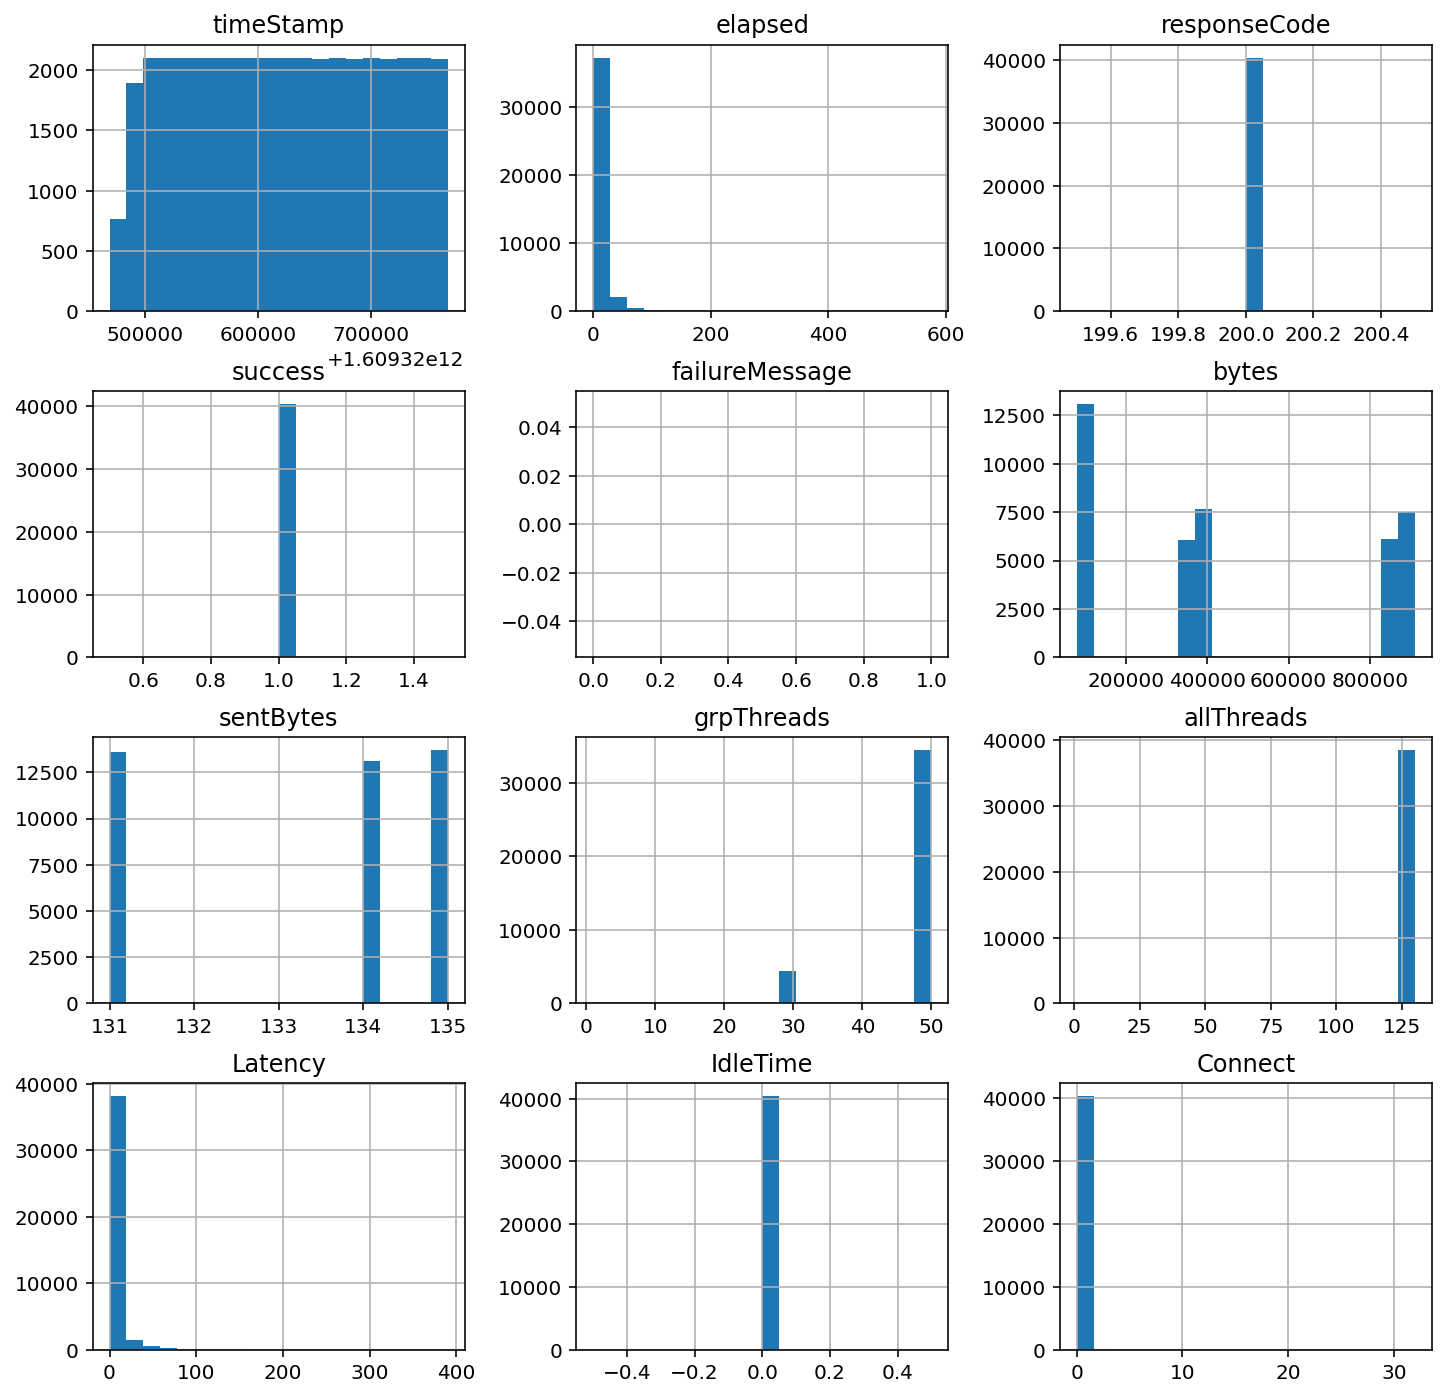

In [14]:
df_high.hist(figsize=(12, 12), bins=20)
plt.show()

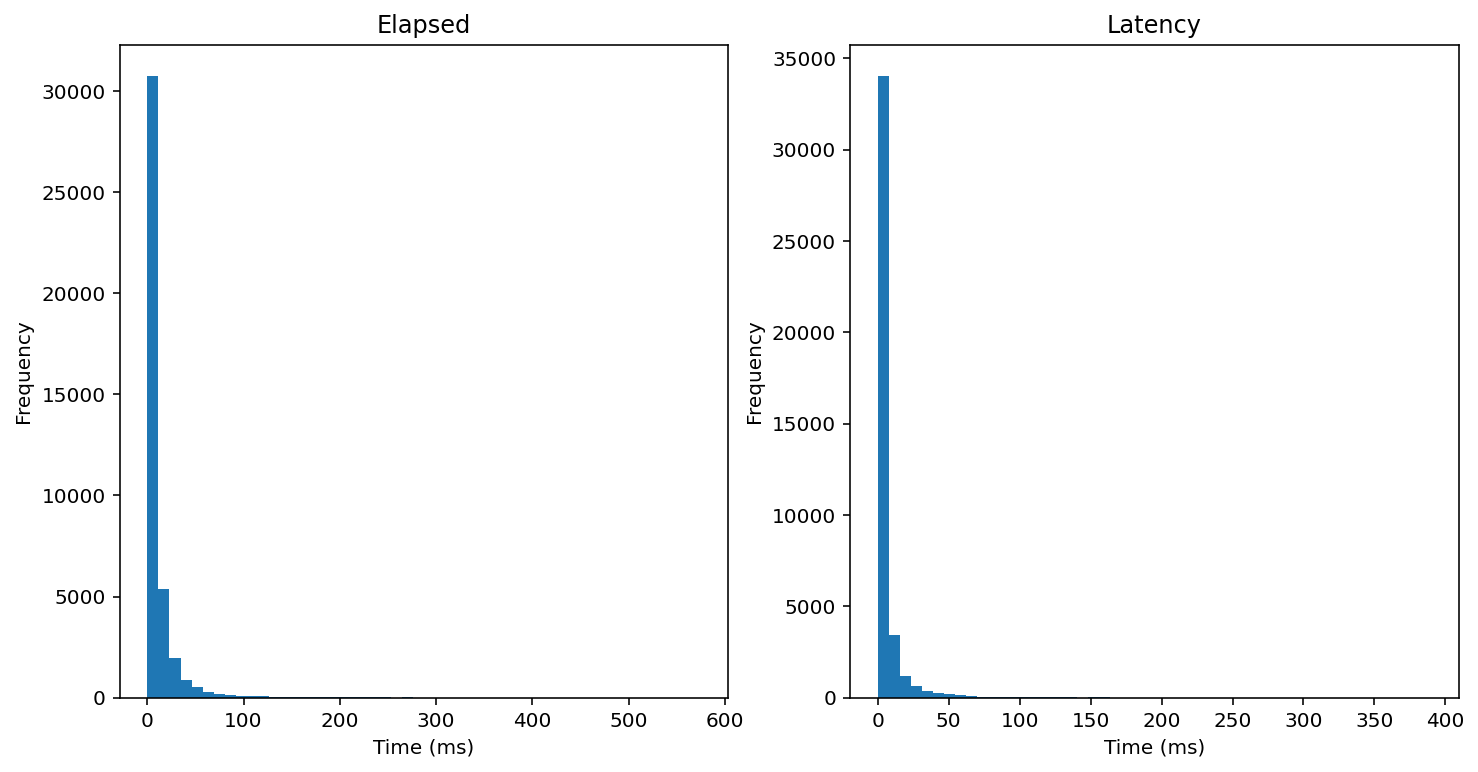

In [23]:
fig = plt.figure(figsize=(12,6))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_high.elapsed.plot.hist(bins=50, ax=ax0)
df_high.Latency.plot.hist(bins=50, ax=ax1)

ax0.set_title('Elapsed')
ax0.set_xlabel('Time (ms)')
# ax0.set_xticks(np.arange(0, max(df_high.elapsed), 5))

ax1.set_title('Latency')
ax1.set_xlabel('Time (ms)')
# ax1.set_xticks(np.arange(0, max(df_high.Latency), 5))

plt.show()

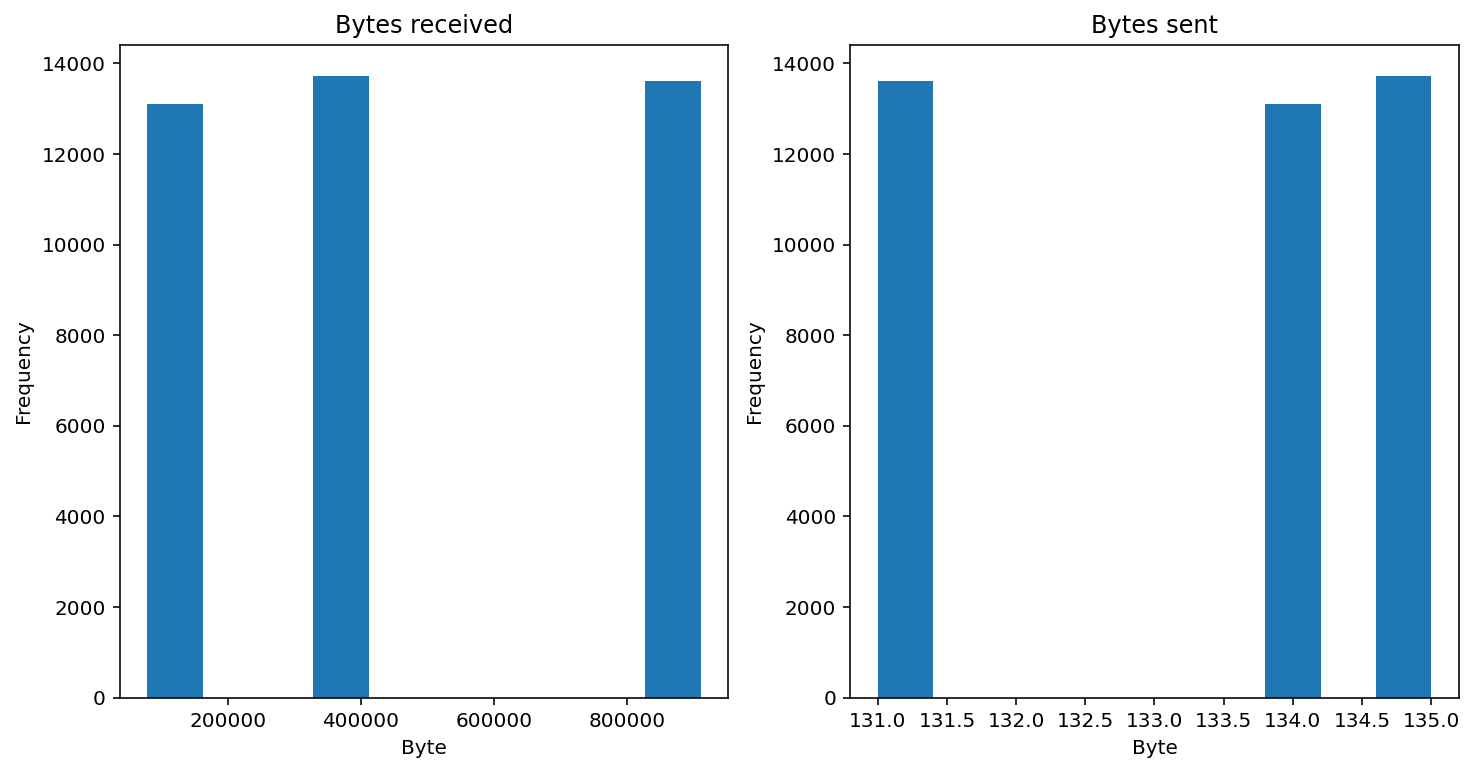

In [28]:
fig = plt.figure(figsize=(12,6))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_high.bytes.plot.hist(ax=ax0)
df_high.sentBytes.plot.hist(ax=ax1)

ax0.set_title('Bytes received')
ax0.set_xlabel('Byte')

ax1.set_title('Bytes sent')
ax1.set_xlabel('Byte')

plt.show()

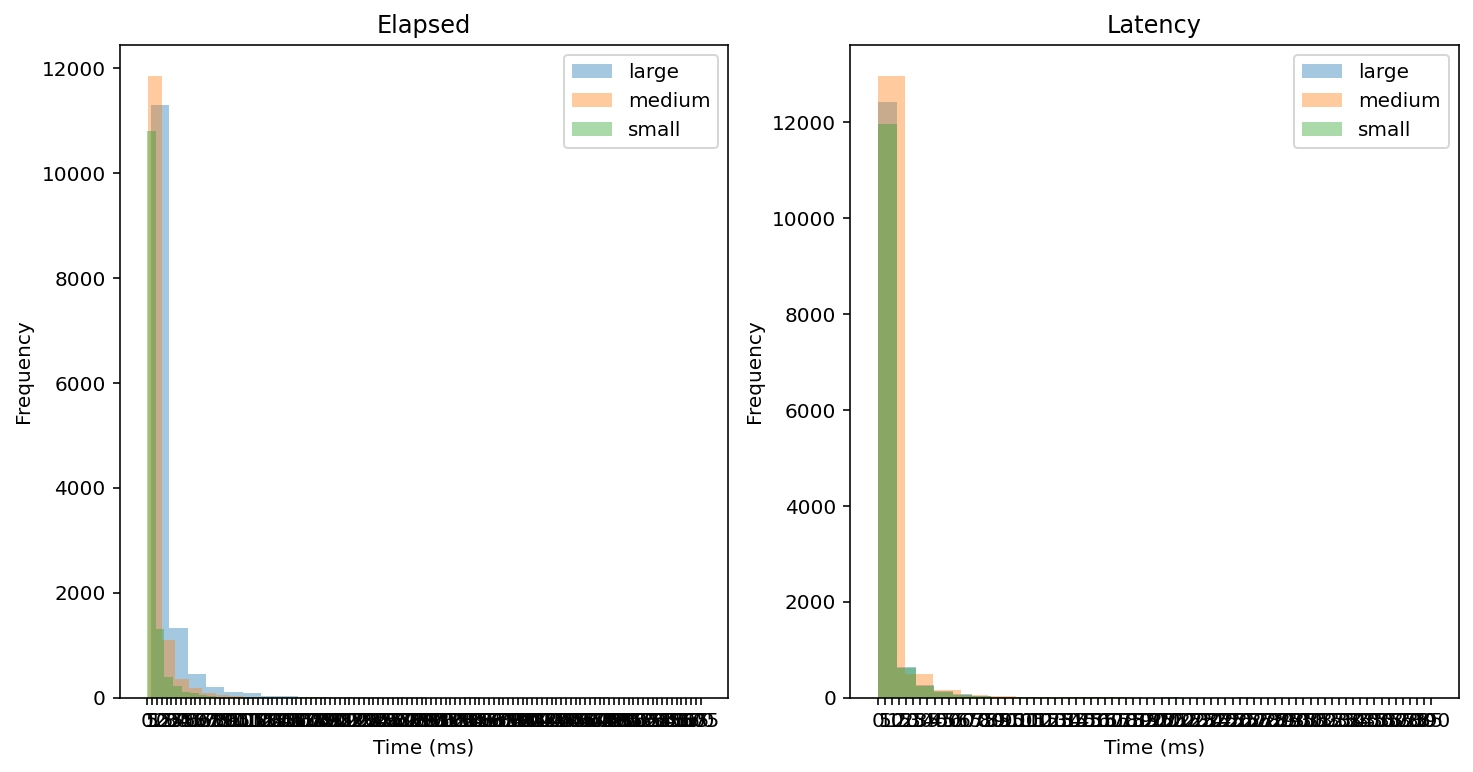

In [29]:
fig = plt.figure(figsize=(12,6))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_high.groupby(by='Type').elapsed.plot.hist(bins=30, alpha=0.4, legend=True, ax=ax0)
df_high.groupby(by='Type').Latency.plot.hist(bins=20, alpha=0.4, legend=True, ax=ax1)

ax0.set_title('Elapsed')
ax0.set_xlabel('Time (ms)')
ax0.set_xticks(np.arange(0, max(df_high.elapsed)+1, 5))


ax1.set_title('Latency')
ax1.set_xlabel('Time (ms)')
ax1.set_xticks(np.arange(0, max(df_high.Latency)+1, 5))

plt.show()

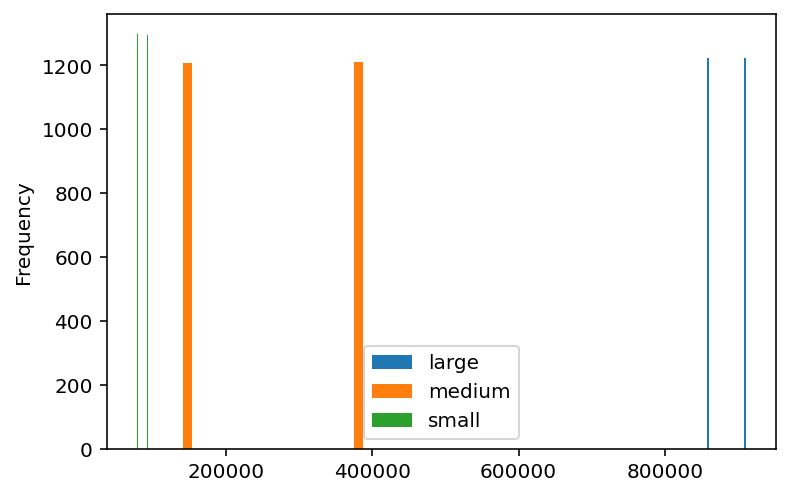

In [58]:
df_high.groupby(by='Type').bytes.plot.hist(bins=20, alpha=1, legend=True)

plt.show()

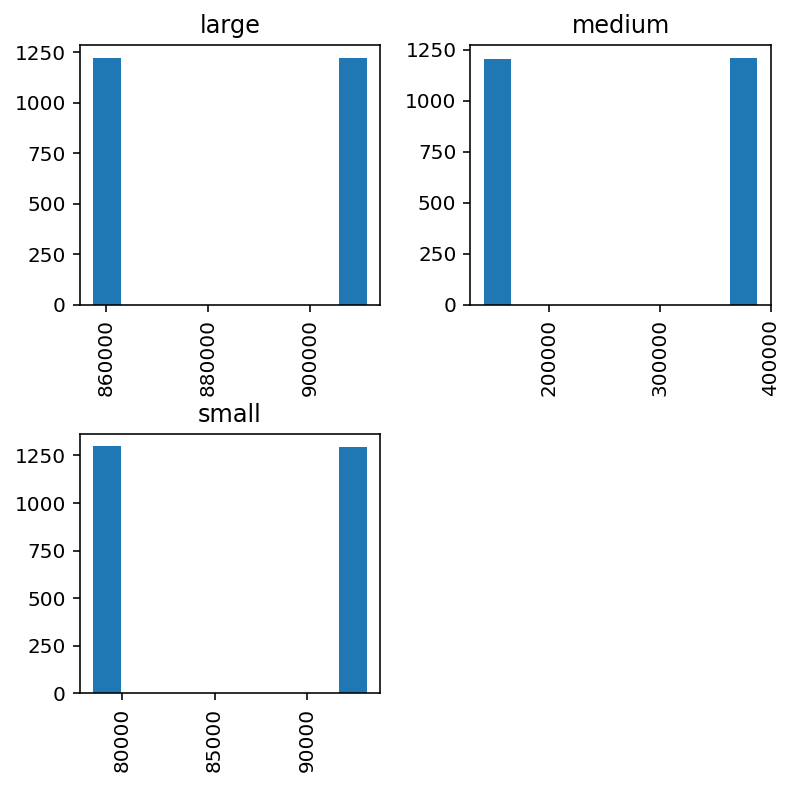

In [91]:
df_high.hist(by='Type', column='bytes', figsize=(6,6))
plt.show()